# Import modules

In [1]:

import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import logistic_forecast
from get_data import select_country,select_region,clean_dataframe,parse_data,plot_comparison

# Download data

In [2]:
website='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/'
#website='https://raw.githubusercontent.com/mkosunen/COVID-19/fix_france_start_2020402/csse_covid_19_data/csse_covid_19_time_series/'

url='time_series_covid19_confirmed_global.csv'
dataframe_download=pd.read_csv(website+url)

url2='time_series_covid19_recovered_global.csv'
dataframe_r_download = pd.read_csv(website+url2)

url3='time_series_covid19_deaths_global.csv'
dataframe_d_download = pd.read_csv(website+url3)

In [20]:
country='Italy'

region=None

In [21]:
dataframe,dataframe_r,dataframe_d,country=select_country(dataframe_download,dataframe_r_download,dataframe_d_download,country=country,region=region)
dataframe,dataframe_r,dataframe_d=select_region(dataframe,dataframe_r,dataframe_d,region=region)
df=clean_dataframe(dataframe)
df_d=clean_dataframe(dataframe_d)
df_r=clean_dataframe(dataframe_r)

totalinfections,newinfections,totaldead,newdead,totalrecovered,newrecovered,last_date=parse_data(df,df_r,df_d)

Last update: 2020-04-13 00:00:00
Total infected: 159516
Total infected today: 3153
Total dead: 20465
Total dead today: 566
Total recovered: 35435
Total new recovered today : 1224
Growth factor: 0.771
Mean growth factor: 0.943


/Users/ivandebono/Desktop/covid19/get_data.py:95: RuntimeWarning: divide by zero encountered in true_divide
  gf_list = dailyinfected[1:] / dailyinfected[:-1]
/Users/ivandebono/Desktop/covid19/get_data.py:95: RuntimeWarning: invalid value encountered in true_divide
  gf_list = dailyinfected[1:] / dailyinfected[:-1]


In [22]:
df.head()

,Date,137,Total
0,2020-01-22,0,0
1,2020-01-23,0,0
2,2020-01-24,0,0
3,2020-01-25,0,0
4,2020-01-26,0,0


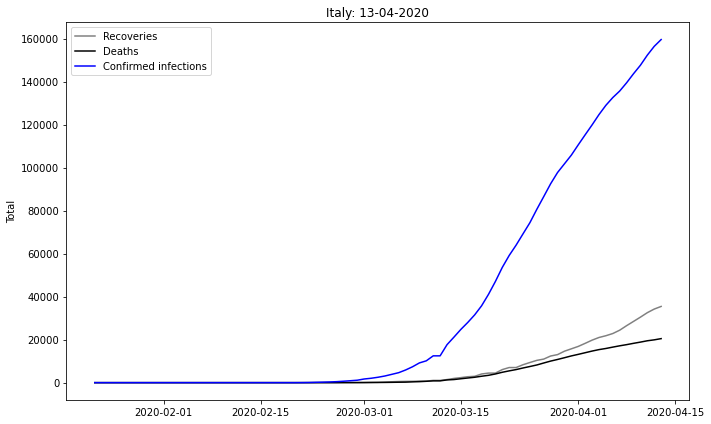

In [23]:
plot_comparison(df,df_r,df_d,country,last_date)

# Forecast

Logistic growth equation is:
$$ y = \frac{L}{ 1 + \mathrm{exp}(-k(x-x_0))} + y_0 \, \, ,$$

where $L$ is the curve's maximum value, $k$ is the logistic growth rate, $x_0$ is the $x$-value at the midpoint of the sigmoid, and $y_0$ is the shift in the $y$-axis.

Its derivative is:
$$ \frac{\mathrm{d}y}{\mathrm{d}x} = \frac{k \, L \, \mathrm{exp}(-k(x-x_0)) } { (1 + \mathrm{exp}(-k(x-x_0)))^2} \, \,, $$

where $L$ is the integral of the curve, $k$ is the logistic growth rate, and $x_0$ is the $x$-value at the peak.

In [24]:
coeff_std = 3.5 # coefficient to define no. of standard deviations to use
coeff_std_d = 1.5

do_imgs=True

# Infections

Italy: Infections
    fit: L=164179.622, k=0.149, x0=-17.418, y0=0.000
perr [1.88145612e+03 3.13101370e-03 2.03930775e-01 3.40231725e+02]


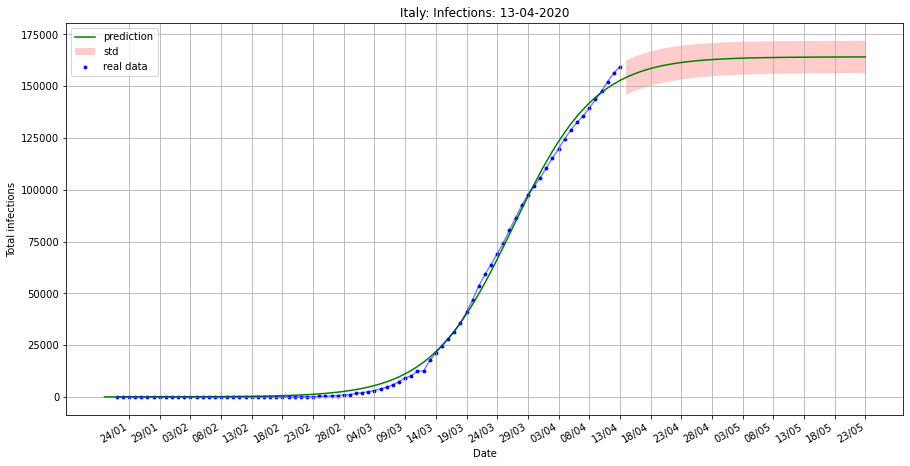

Italy: Daily new infections
    fit: L=187348.884, k=0.121, x0=-16.096
perr [7.46545946e+03 6.20841017e-03 5.37718662e-01]


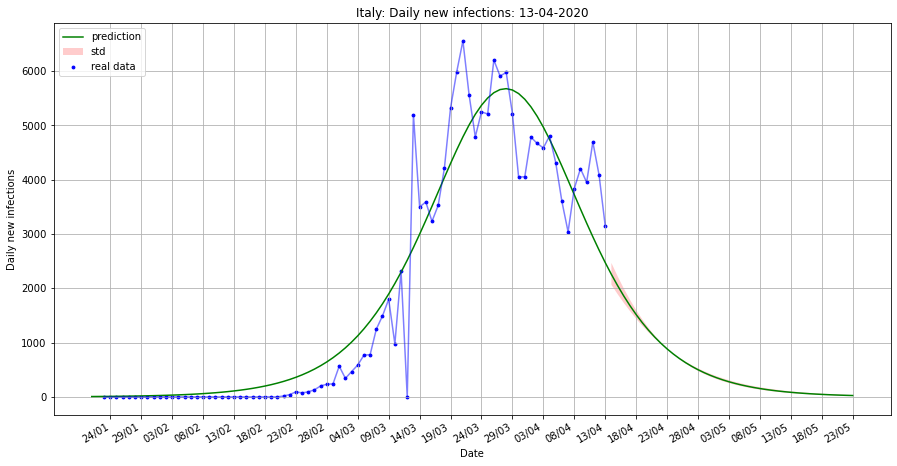

(array([ 1.87348884e+05,  1.21196229e-01, -1.60961341e+01]),
 array([7.46545946e+03, 6.20841017e-03, 5.37718662e-01]))

In [25]:
logistic_forecast.fit_curve(logistic_forecast.logistic, totalinfections, str(country)+': Infections', 'Total infections', last_date, coeff_std, do_imgs,plt_forecast=True,show_every=5)

logistic_forecast.fit_curve(logistic_forecast.logistic_derivative, newinfections, str(country)+': Daily new infections', 'Daily new infections', last_date, coeff_std_d, do_imgs,plt_forecast=True,show_every=5)

# EVOLUTION: Infections

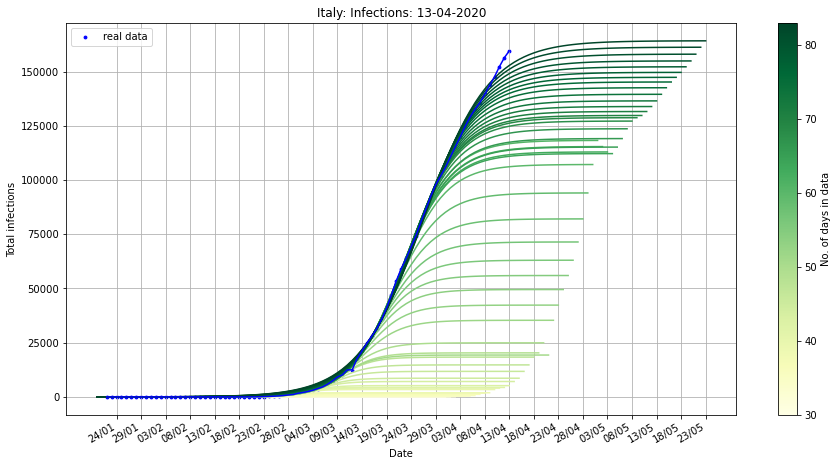

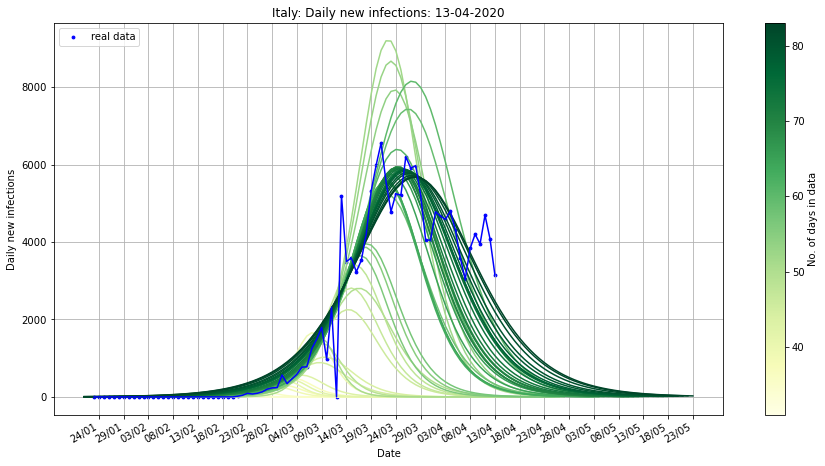

In [26]:

logistic_forecast.fit_curve_evolution(logistic_forecast.logistic, totalinfections, str(country)+': Infections', 'Total infections', last_date, coeff_std, do_imgs,plt_forecast=True,daily=False,show_every=5)

logistic_forecast.fit_curve_evolution(logistic_forecast.logistic_derivative, newinfections, str(country)+': Daily new infections', 'Daily new infections', last_date, coeff_std_d, do_imgs,plt_forecast=True,show_every=5,daily=True)

# Deaths

Italy: Deaths
    fit: L=21583.022, k=0.163, x0=-14.858, y0=0.000
perr [2.02165350e+02 2.61959240e-03 1.52094641e-01 3.01576704e+01]


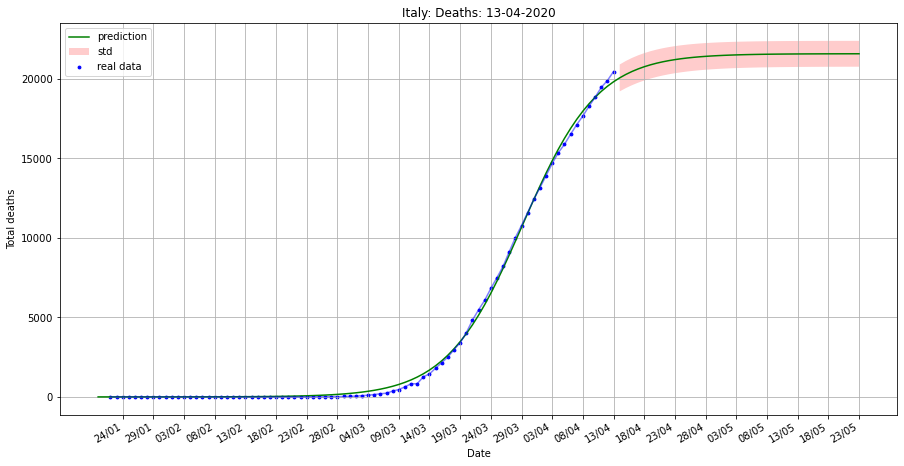

Italy: Daily deaths
    fit: L=24124.863, k=0.137, x0=-13.689
perr [7.08191875e+02 5.16322171e-03 3.49577046e-01]


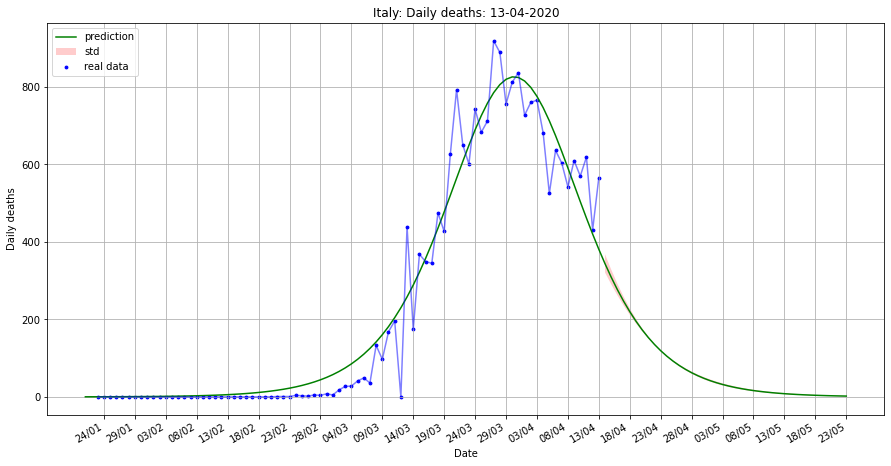

(array([ 2.41248631e+04,  1.37005529e-01, -1.36894023e+01]),
 array([7.08191875e+02, 5.16322171e-03, 3.49577046e-01]))

In [30]:
logistic_forecast.fit_curve(logistic_forecast.logistic, totaldead, str(country)+': Deaths', 'Total deaths',
                             last_date, coeff_std, do_imgs,plt_forecast=True)

logistic_forecast.fit_curve(logistic_forecast.logistic_derivative, newdead, str(country)+': Daily deaths', 'Daily deaths', 
          last_date, coeff_std_d, do_imgs,plt_forecast=True)



# EVOLUTION: Deaths

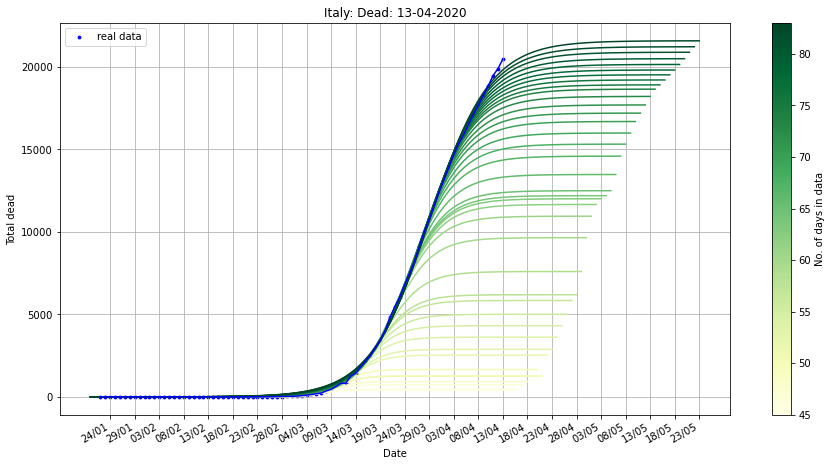

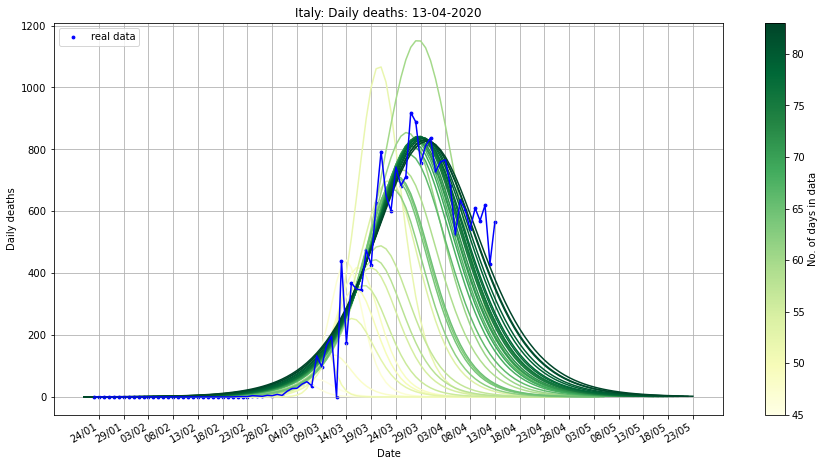

In [31]:

logistic_forecast.fit_curve_evolution(logistic_forecast.logistic, totaldead, str(country)+': Dead', 'Total dead', last_date, coeff_std, do_imgs,plt_forecast=True,
                                                          daily=False,show_every=5,days_future=40,day_start=45)

logistic_forecast.fit_curve_evolution(logistic_forecast.logistic_derivative, newdead, str(country)+': Daily deaths', 'Daily deaths', 
                                              last_date, coeff_std_d, do_imgs,plt_forecast=True,show_every=5,daily=True,day_start=44)

# Recoveries

Italy: Total recovered
    fit: L=50204.573, k=0.126, x0=-6.434, y0=0.000
perr [1.96506286e+03 3.66434226e-03 6.53960838e-01 7.74758711e+01]


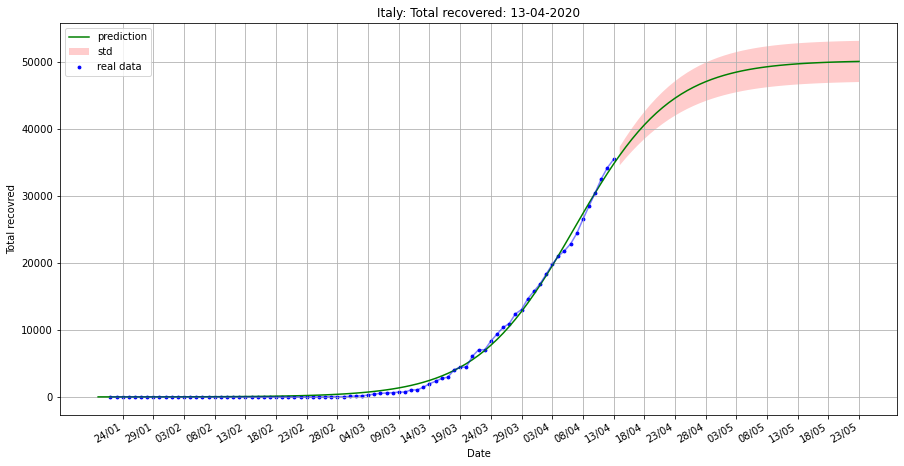

Italy: Daily new recovered
    fit: L=62970.000, k=0.105, x0=-2.346
perr [9.92293276e+03 1.35861755e-02 2.65656322e+00]


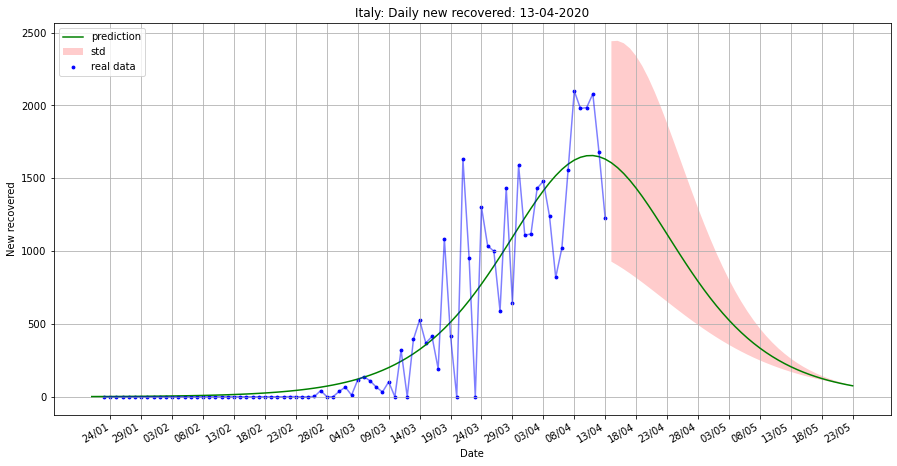

(array([ 6.29700000e+04,  1.05217087e-01, -2.34615614e+00]),
 array([9.92293276e+03, 1.35861755e-02, 2.65656322e+00]))

In [33]:
logistic_forecast.fit_curve(logistic_forecast.logistic, totalrecovered, str(country)+': Total recovered', 'Total recovred',
                                 last_date, coeff_std_d, do_imgs,plt_forecast=True)
    
logistic_forecast.fit_curve(logistic_forecast.logistic_derivative, newrecovered, str(country)+': Daily new recovered', 'New recovered', 
          last_date, coeff_std_d, do_imgs,plt_forecast=True)

# EVOLUTION: Recoveries

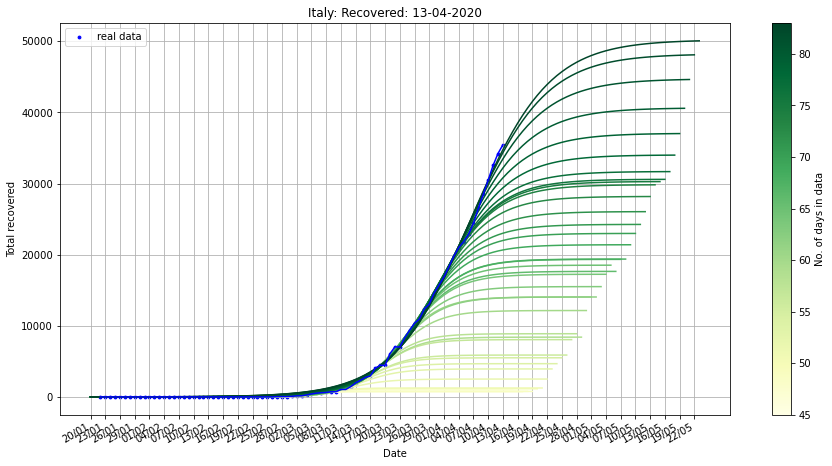

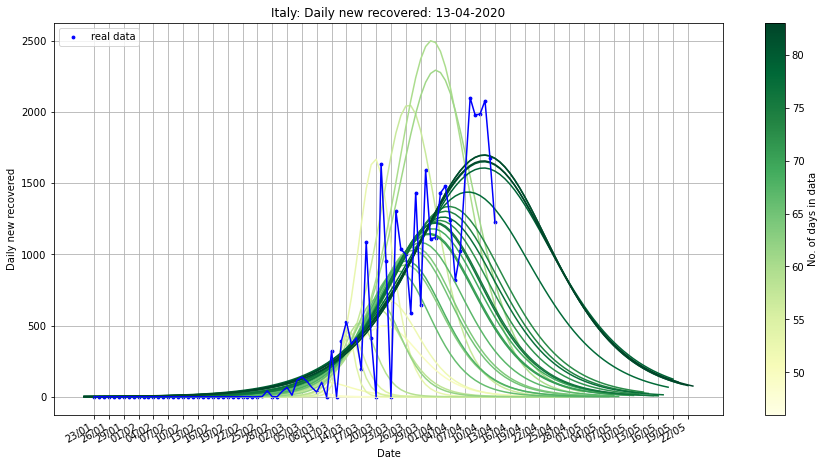

In [34]:
logistic_forecast.fit_curve_evolution(logistic_forecast.logistic, totalrecovered, str(country)+': Recovered', 'Total recovered',
                             last_date, coeff_std, do_imgs,plt_forecast=True,daily=False,day_start=45)


logistic_forecast.fit_curve_evolution(logistic_forecast.logistic_derivative, newrecovered, str(country)+': Daily new recovered', 'Daily new recovered',
                                      last_date, coeff_std_d, do_imgs,plt_forecast=True,daily=True,day_start=45)